# MODELO DE PREDICCIÓN DE ENFERMEDAD CARDÍACA

## Carga y tratamiento de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Datos obtenidos de Kaggle : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

**Column Descriptions:**  
**id** (Unique id for each patient)  
**age** (Age of the patient in years)  
**origin** (place of study)  
**sex** (Male/Female)  
**cp** chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])  
**trestbps** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))  
**chol** (serum cholesterol in mg/dl)  
**fbs** (if fasting blood sugar > 120 mg/dl)  
**restecg** (resting electrocardiographic results)  
-- Values: [normal, stt abnormality, lv hypertrophy]  
**thalach:** maximum heart rate achieved  
**exang:** exercise-induced angina (True/ False)  
**oldpeak:** ST depression induced by exercise relative to rest  
**slope:** the slope of the peak exercise ST segment  
**ca:** number of major vessels (0-3) colored by fluoroscopy  
**thal:** [normal; fixed defect; reversible defect]  
**num:** the predicted attribute  

In [7]:
# Leer datos CSV
data = pd.read_csv("heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Comprobar numero de filas y columnas para saber si se cargó bien el fichero

In [8]:
data.shape


(920, 16)

### Análisis de datos


Información general del Dataframe para inferir si existen valores nulos

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Se observa que existen valores nulos para las columnas :  
- trestbps  
- chol  
- fbs  
- restecg  
- thatch  
- exang  
- oldpeak  
- slope  
- ca  
- thal  


Información estadística sobre el dataset.

Esta función muestra las caracterísitcas estadísticas básicas de cada variable numérica
_number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles._

In [9]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


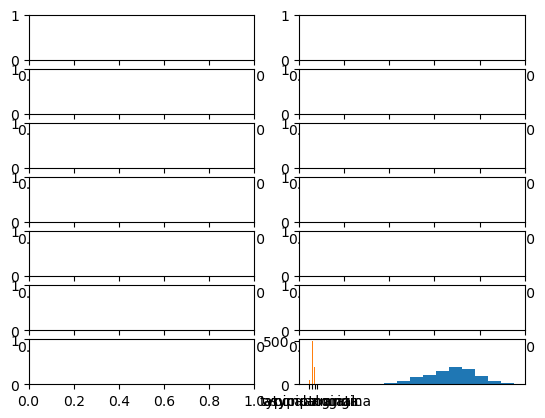

In [16]:
# plot:
fig, ax = plt.subplots(7,2)

ax[0,0]=plt.hist(data['age'])
ax[0,1]=plt.hist(data['cp'])
